<a href="https://colab.research.google.com/github/lifelonglearnerit/numerical_methods/blob/main/spring_mass_euler_runge_kutta_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
# Euler 
# warunki poczatkowe 
#x = int(input('wprowadz wychylenie x: ')) # wychylenie z polozenia rownowagi 
#v = int(input('wprowadz predkosc v: '))   # predkosc 
#k = int(input('wprowadz wspolczynnik sprezystosci k: ') ) # sprezystosc
#c = int(input('wprowadz wspolczynnik tlumienia c: ')) # tlumienie
x0 = 20.0
v0 = 0.0
k = 50.0
c = 15.0
m = 10
dt = 0.1 # krok calkowania
t0 = 0.0
stop = 100
x = [0.0 for t in range(int(t0),stop)] # dziedzina funkcji 
v = [0.0 for t in range(int(t0),stop)] 
t = [0.0 for t in range(int(t0),stop)]
x[0] = x0
v[0] = v0
t[0] = t0
print(len(x))
print(len(v))
print(len(t))

100
100
100


In [ ]:
x2 = [0.0 for t in range(int(t0),stop)] # dziedzina funkcji 
v2 = [0.0 for t in range(int(t0),stop)] 
t2 = [0.0 for t in range(int(t0),stop)]
x2[0] = x0
v2[0] = v0
t2[0] = t0

$Solution \ Euler \ method: \\
x'' = acceleration \\
x' = velocity \ v \\
x = initial \ dissplacement \\ 
$ 

$Differential \ equations: \\
x(t_0) = x_0 \\
x' = v \\ 
v' = -\frac{k}{m}· x -\frac{c}{m}·v$

In [ ]:
def f(x: float, v: float) -> float:
    accel = -(k/m) * x -(c/m) * v
    return accel

$x_{n+1} = x_n + Δt · v_n \\
v_{n+1} = v_n + Δt (-\frac{k}{m}· x_n -\frac{c}{m}·v_n)$ 

[20.0, 20.0, 19.0, 17.15, 14.627499999999998, 11.625874999999997, 8.343118749999997, 4.971482187499998, 1.688435171874998, -1.3507289007812515, -4.018440121132813, -6.218458213392578, -7.8875515857567375, -8.995358041596644, -9.542615949772728, -9.558017269642566, -9.093977594043292, -8.22164300630178, -7.0254597270193315, -5.597621789314161, -4.032686555913799, -2.422610518057784, -0.8524115580844809, 0.603388083795716, 1.8834383572981075, 2.9413116855853545, 3.746332096764609, 4.283533861987707, 4.552838757589111, 4.5675712257509185, 4.352451885808999, 3.9412218855708216, 3.374053791077921, 2.6948998164804143, 1.9489162485186375, 1.1800852249271065, 0.42913304244837325, -0.26818057390490535, -0.8823537999276109, -1.3909920133516653, -1.779216804765731, -2.0396582768001035, -2.1720726877910335, -2.182642023293319, -2.0830223240807095, -1.8892134785853258, -1.6203248437102142, -1.2973088301371032, -0.941728976414448, -0.5746206592433358, -0.21549214082716817, 0.11849813278874116, 0.413

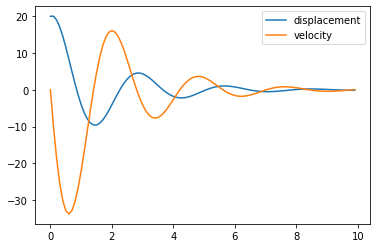

In [ ]:

def euler(k: float, m: float,  x: list, c: float, v: list, t:list, dt: float,) -> list:
    for n in range(1,len(x)):
         t[n] = t[n - 1] + dt
         x[n] = x[n - 1] + dt * v[n-1]
         v[n] = v[n-1] + dt * f(x[n-1], v[n-1])
    return x,v,t

euler_x, euler_v, euler_t = euler(k,m,x,c,v,t,dt)
print(euler_x)
print(euler_v)
print(euler_t)
plt.plot(euler_t, euler_x, label='displacement')
plt.plot(euler_t, euler_v, label='velocity')
plt.legend()
plt.show()

$ma = -kx -cv \\ 
x' = v \\ 
v' = -\frac{k}{m}· x -\frac{c}{m}·v$

$Runge \ Kutta \ method: \\
x_{n+1} = x_n + \frac{h}{6}(v_1 + 2v_2 + 2v_3 +v_4) \\
v_{n+1} = v_n + \frac{h}{6}(a_1 + 2a_2 + 2a_3 +a_4)$



In [ ]:
def rk4(k: float, m: float,  x2: list, c: float, v2: list, t2:list, dt: float,) -> list:
    for n in range(len(t)-1):
        #t
        t2[n+1] = t2[n] + dt
        # k1
        k1_x = x2[n]
        k1_v = v2[n]
        k1_a = f(k1_x, k1_v)
        # k2
        k2_x = x2[n] + k1_v * (dt / 2)
        k2_v = v2[n] + k1_a * (dt / 2)
        k2_a = f(k2_x, k2_v)
        # k3
        k3_x = x2[n] + k2_v * (dt / 2)
        k3_v = v2[n] + k2_a * (dt / 2)
        k3_a = f(k3_x, k3_v)
        # k4
        k4_x = x2[n] + k3_v * dt  
        k4_v = v2[n] + k3_a  * dt
        k4_a =  f(k4_x, k4_v)
        # print(f'k1_x{k1_x} | k2_x{k2_x} | k3_x{k3_x} | k4_x{k4_x}')
        # x_n, v_n
        x2[n + 1] = x2[n] + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
        v2[n + 1] = v2[n] + (dt / 6) * (k1_a + 2 * k2_a + 2 * k3_a + k4_a)
        
        # print(f'Result in n={n}: x = {x2[n + 1]} | v = {v2[n + 1]}')
        # print('---------------------------------------------------')
    return x2, v2, t2
    

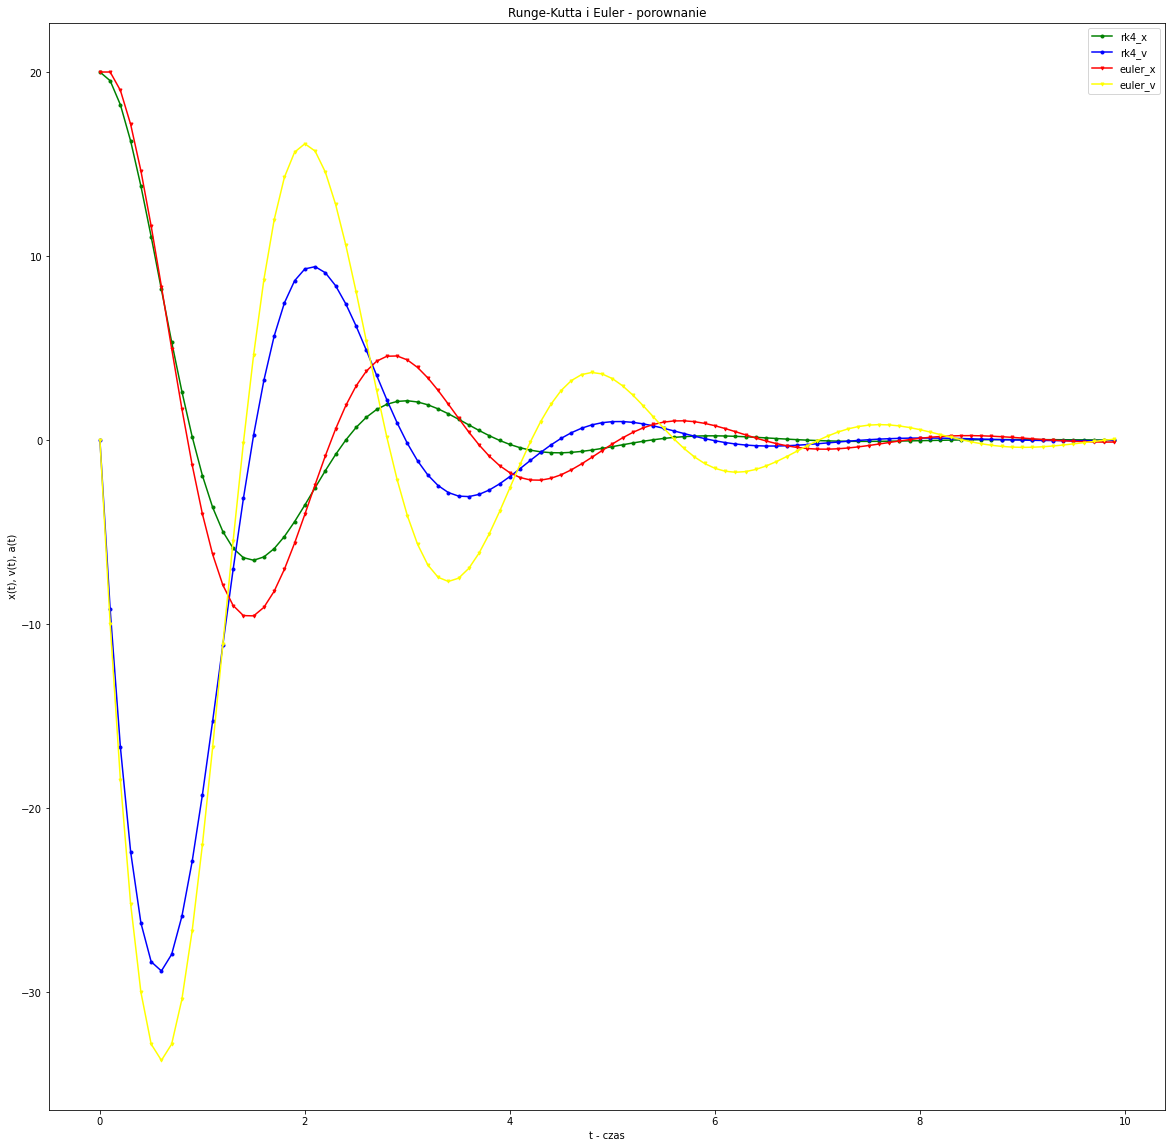

In [ ]:
rk4_x, rk4_v, rkt2 = rk4(k,m,x2,c,v2,t2,dt)
plt.figure(figsize=(20,20))
plt.plot(t, rk4_x, color='green', marker='o', markersize=3, label='rk4_x' )
plt.plot(t, rk4_v, color='blue', marker='o', markersize=3, label='rk4_v' )
plt.plot(t, euler_x, color='red', marker='v', markersize=3, label='euler_x')
plt.plot(t, euler_v, color='yellow', marker='v', markersize=3, label='euler_v')
plt.xlabel('t - czas')
plt.ylabel('x(t), v(t), a(t)')
plt.title('Runge-Kutta i Euler - porownanie')
plt.legend()
plt.show()

In [ ]:
for i_x, i_v, i_rkx, i_rkv in zip(euler_x, euler_v, rk4_x, rk4_v):
  print(i_x, '==', i_rkx, i_x == i_rkx, '|', i_v, '==', i_rkv, i_v == i_rkv)
 

20.0 == 20.0 True | 0.0 == 0.0 True
20.0 == 19.526145833333334 False | -10.0 == -9.209010416666667 False
19.0 == 18.215459826687283 False | -18.5 == -16.709559944837782 False
17.15 == 16.24510113395676 False | -25.225 == -22.3928055052543 False
14.627499999999998 == 13.798054899381643 False | -30.01625 == -26.249090886429652 False
11.625874999999997 == 11.053860095071666 False | -32.8275625 == -28.35457812593211 False
8.343118749999997 == 8.180788158662684 False | -33.716365624999995 == -28.85577293464577 False
4.971482187499998 == 5.329631995521494 False | -32.830470156249994 == -27.952952988213898 False
1.688435171874998 == 2.6291682266770477 False | -30.391640726562493 == -25.883418125520805 False
-1.3507289007812515 == 0.18326943935452222 False | -26.677112203515616 == -22.905361721482127 False
-4.018440121132813 == -1.9304298569249863 False | -22.000180922597647 == -19.28302245538947 False
-6.218458213392578 == -3.6604682919318927 False | -16.690933723641592 == -15.273624675668 Fa

In [ ]:
# midpoint method: https://en.wikipedia.org/wiki/Midpoint_method 
# create one more solution with intermediate method
